# Welcome To The Hands On Experience On A Simple Neural Network With Deep Learning (For Image Classifications)

All Literature about PyTorch could be found at [PyTorch](http://pytorch.org/) -http://pytorch.org

###### **To Slides: What is tensor

In [ ]:
#---A breif intro about Anaconda prompt..

#activate
#deactivate

#---jupyter notebooks 
#print('hello')

#-- how to check if you have a GPU

In [ ]:
#---This is how you can comment in jupyter

In [4]:

#Following two commands are needed only if you run your python codes in jupyter notebooks.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Now we import needed packages
import numpy as np  # does all the numerical calculations 
import torch
import matplotlib.pyplot as plt #library easy to plot a matrix into a graphical plot
from torch import nn #neural network module 
from torch import optim # for the optimization 
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

 ##### **** Let's start making a convolutional neural network 

There are many datasets available in Torch Vision

A list of such databases are given in --> https://pytorch.org/docs/stable/torchvision/datasets.html

In [5]:
# Define a transform image augmentation to normalize the data
# ---other transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])


# Download and load the training data
#We need to define a set and loader. The set defines training validating and test sets and its boundaries. 
#Loaders actually load data into the memory.
trainset = datasets.CIFAR10('data', download=True, train=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
##--- how to see function arguements
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
#Define your classes 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

##### Converting images to a Tensor file and Numpy and 

In [8]:
#iterate function to go through pictures
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [ ]:
#-- explain a tensor

In [ ]:
#let's see what the computer sees
labels

#--also can see the shape .. 

In [9]:
images

tensor([[[[-0.0196, -0.0275, -0.0588,  ..., -0.3333, -0.4510, -0.3961],
          [ 0.0667,  0.0039, -0.1059,  ..., -0.5216, -0.6235, -0.5686],
          [-0.0275,  0.1608,  0.0980,  ..., -0.4039, -0.4275, -0.3333],
          ...,
          [ 0.4824,  0.4824,  0.3725,  ...,  0.4353,  0.3569,  0.2941],
          [ 0.3020,  0.4196,  0.4745,  ...,  0.2314,  0.3804,  0.1608],
          [ 0.1922,  0.3490,  0.3412,  ...,  0.3569,  0.4902,  0.3490]],

         [[-0.2392, -0.2235, -0.2471,  ..., -0.5686, -0.6471, -0.6549],
          [-0.2000, -0.2863, -0.4196,  ..., -0.8980, -0.9529, -0.9451],
          [-0.1922, -0.0275, -0.1059,  ..., -0.7412, -0.7098, -0.6392],
          ...,
          [ 0.4275,  0.3490,  0.1686,  ...,  0.2392,  0.1137,  0.0667],
          [ 0.2706,  0.3412,  0.3412,  ...,  0.0510,  0.1529, -0.0431],
          [ 0.1922,  0.3255,  0.2784,  ...,  0.2549,  0.3333,  0.2235]],

         [[-0.2314, -0.2392, -0.2784,  ..., -0.5686, -0.6627, -0.6549],
          [-0.1843, -0.3255, -

In [10]:
images.shape

#-- draw this-- 

torch.Size([64, 3, 32, 32])

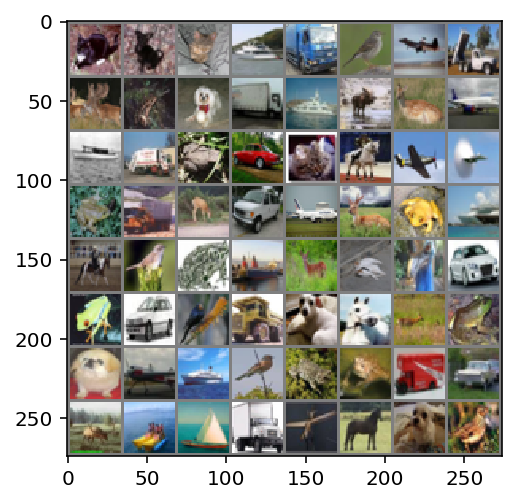

  cat   dog   cat  ship truck  bird plane truck  deer  frog


In [11]:
#what do you have
#To convert a Tensor to a numpy thereby to visualize the image...

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images in a grid 
imshow(torchvision.utils.make_grid(images))

# print respective labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

###### Let's define a Convolutional Neural Network

In [26]:
#This is the heart of the modelling. 
#You may use this as a base to further develop 
#--change this initally to 0
model =1
class myNeuralNetwork(nn.Module):
#-- change names, strides, etc..
    if(model==0):
        def __init__(self):
            super(myNeuralNetwork, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 5)
            #self.relu1=nn.ReLU(inplace=True)
            self.pool = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)      

        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = x.view(-1, 16 * 5 * 5)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    if(model==1):
        def __init__(self):
            super(myNeuralNetwork, self).__init__()
            self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
            self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
            self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
            # max pooling layer
            self.pool = nn.MaxPool2d(2, 2)
            self.fc1 = nn.Linear(64 * 4 * 4, 500)
            self.dropout = nn.Dropout(0.5)
            self.fc2 = nn.Linear(500, 10)
            # dropout layer 50% of neurons are dropped out
            

        def forward(self, x):
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = self.pool(F.relu(self.conv3(x)))
            # flatten image input
            x = x.view(-1, 64 * 4 * 4)
            # add dropout layer
            x = self.dropout(x)
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            x = self.fc2(x)
            return x
        
        
myNeuralNetwork = myNeuralNetwork()

In [27]:
print(myNeuralNetwork)

myNeuralNetwork(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout): Dropout(p=0.5)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [28]:
#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myNeuralNetwork.parameters(), lr=0.005,momentum=0.05)

In [29]:
#Train the network
#--epoch is Means an iterator. 
#-- run with 1
for epoch in range(8):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #this is how to write a for loop in python. 
                                              #similar to i;i=0;i++ in c++ or java.
            
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Now we do the training.
        #1. First goes the forward pass. Get the output.
        #we define a loss function (so as to calculate how much far is the predicted from the actual)
        #2. Then the output is compared against the actual.
        #3. Then the backward propagation is made to optimize the parameters to get a minimum loss.
        #Minimum loss means the prediction is so close to the actual label.
       
        outputs = myNeuralNetwork(inputs)
        loss = criterion(outputs, labels)
        loss.backward()     
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()


print('Finished Training')

Finished Training


###### Note that now the model and it's parameters are in the RAM. If you want to save the model, you could use model.save

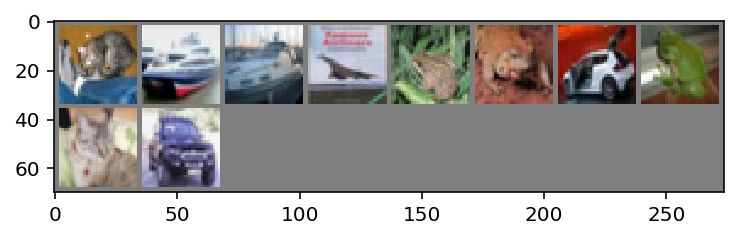

Actual Labels:    cat  ship  ship plane  frog  frog   car  frog   cat   car


In [30]:
#Now the training is done. 
#Let's test on test data.

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Actual Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [31]:
#machine learning prediction
outputs = myNeuralNetwork(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

Predicted:    cat  ship  ship  ship   dog  frog   car  deer   dog plane


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = myNeuralNetwork(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy for 10,000 images is: %d %%' % (
    100 * correct / total))



Accuracy for 10,000 images is: 39 %


That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [33]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = myNeuralNetwork(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 50 %
Accuracy of   car : 48 %
Accuracy of  bird : 16 %
Accuracy of   cat : 20 %
Accuracy of  deer : 40 %
Accuracy of   dog : 36 %
Accuracy of  frog : 47 %
Accuracy of horse : 47 %
Accuracy of  ship : 43 %
Accuracy of truck : 44 %


In [ ]:
#Now let's see how we can improve the model for better results

In [ ]:
?torch.no_grad

In [ ]:
predicted

# Now Let's try to upload our own image and see the prediction of the model


In [ ]:
#first we need to specify where to fetch it
root=r'C:\Users\jayatilake.s\OneDrive - Procter and Gamble\MSc Thesis Schwalbach\Knowledge Sharing Session\test images'

#Since these are google images we have to resize them
#-- add more transforms
transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])

testset = torchvision.datasets.ImageFolder(root, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=1)

In [ ]:
#Then we need to call our testloader
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

#machine learning prediction for new google images
outputs = myNeuralNetwork(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

##Keras and tensorflow have similar approach..
##show tensorboard for visualization

https://www.tensorflow.org/guide/graph_viz
    
#---keras TF version
http://localhost:8888/notebooks/OneDrive%20-%20Procter%20and%20Gamble/MSc%20Thesis%20Schwalbach/Courses/Udacity-Deep%20learning%20with%20pytorch/deep-learning-v2-pytorch-master/keras/cifar10-classification/cifar10_cnn.ipynb